In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Les tests statistiques d'independance

## Test du Chi-deux

Il permet de tester l'indépendance entre deux variables qualitatives (catégorielles)

In [4]:
df = pd.read_csv("data/Telco_clean.csv")

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Service',
       'nbr_option_internet'],
      dtype='object')

In [13]:
def pivot_table_with_churn(col):
    cont = df[[f"{col}","Churn"]].pivot_table(index=col,columns="Churn",aggfunc=len,margins=True,margins_name="Total")
    return round(cont.div( cont.iloc[:,-1], axis=0).mul(100),2)
    #return round(cont.div(len(df.index)).mul(100),2)

pivot_table_with_churn("SeniorCitizen")


Churn,No,Yes,Total
SeniorCitizen,,,
0,76.35,23.65,100.0
1,58.32,41.68,100.0
Total,73.42,26.58,100.0


In [14]:
    from scipy import stats
    
    CrosstabResult=pd.crosstab(index=df['SeniorCitizen'],columns=df['Churn'])
    # Performing Chi-sq test
    ChiSqResult = stats.chi2_contingency(CrosstabResult)
    ChiSqResult

(158.4408162893713,
 2.4792557203954705e-36,
 1,
 array([[4324.52645051, 1565.47354949],
        [ 838.47354949,  303.52645051]]))

## Test Anova one_way

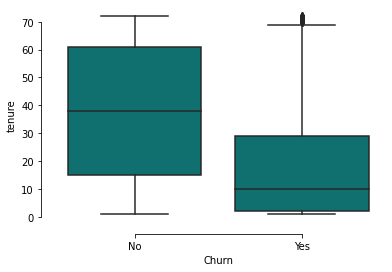

In [15]:
sns.boxplot(x="Churn", y="tenure",palette=["teal"],
            data=df)
sns.despine(offset=10, trim=True)

In [16]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
stats.f_oneway(df['tenure'][df['Churn'] == 'Yes'],
               df['tenure'][df['Churn'] == 'No'])

F_onewayResult(statistic=1007.5094314093412, pvalue=9.437650217603554e-207)

## Test de Pearson R pour les varaibles quantitatives

In [14]:
stats.pearsonr(df['tenure'], df['MonthlyCharges'])

(0.24686176664089346, 3.9898213232673846e-98)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Les test sur les coefficients

In [2]:
import statsmodels.api as sm

In [5]:
df = pd.read_csv("data/Telco_post_analysis.csv")

In [6]:
varlist =  ['gender','SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines',
            'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod' ,'Service' 
            ]

df_encode = pd.get_dummies(df[varlist], drop_first=True) #drop first permet de oneHotencoder plutot que de get_dummies
df_encode = df.drop(varlist, axis=1).join(df_encode)
df_encode.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,nbr_option_internet,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Service_Only Phone,Service_Phone and Internet
0,7590-VHVEG,1,29.85,29.85,No,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,34,56.95,1889.50,No,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,2,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
3,7795-CFOCW,45,42.30,1840.75,No,3,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [19]:
y = df_encode["tenure"]
X = df_encode[["SeniorCitizen","nbr_option_internet","MonthlyCharges", "gender_Male","Partner_Yes"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [20]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 tenure   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              4205.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:48:55   Log-Likelihood:                         -32420.
No. Observations:                7032   AIC:                                  6.485e+04
Df Residuals:                    7029   BIC:                                  6.487e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------